
<h1 align="center">Heart Failure Prediction</h1>

<h4 align="center">Domain: Healthcare and Medical Research</h4>





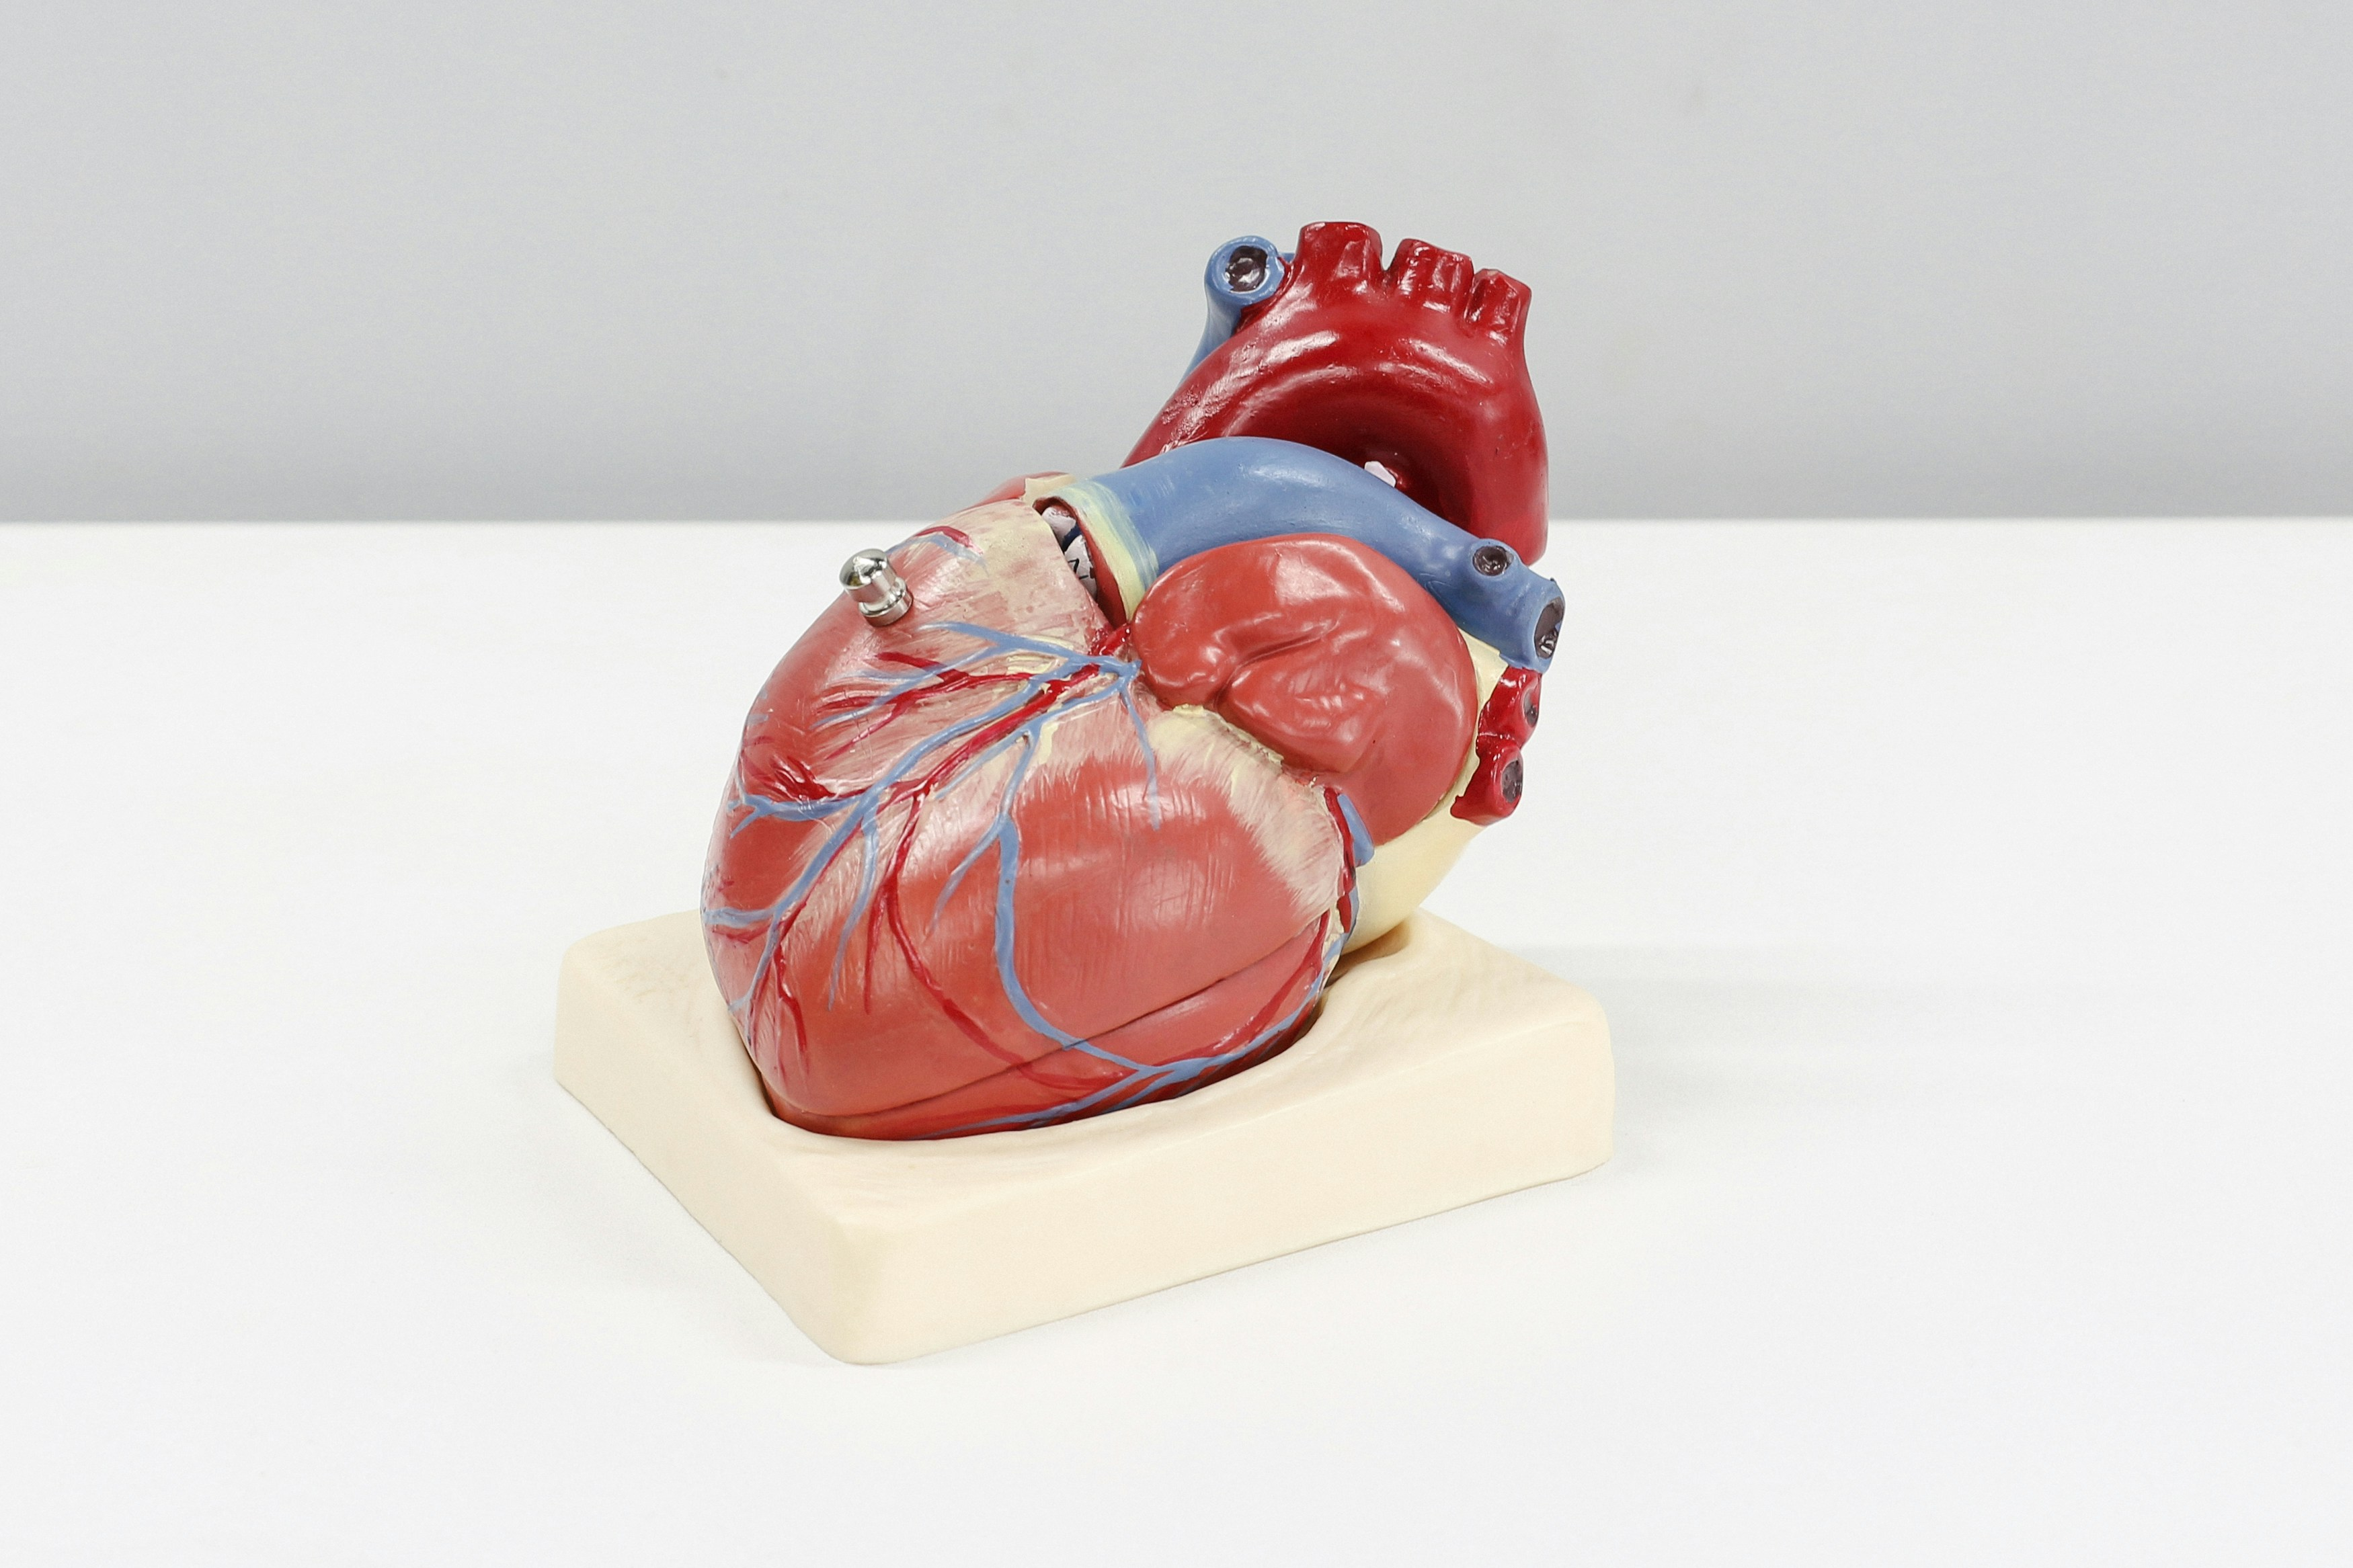

In [236]:
from PIL import Image
from IPython.display import display
# Open and display the image
img = Image.open('/content/heart.jpg')
display(img)
# Resize the image
new_size = (6,2)  # width and height
img_resized = img.resize(new_size)
# Display the resized image
display(img_resized)


Photo by <a href="https://unsplash.com/@hajiluyi?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Ali Hajiluyi</a> on <a href="https://unsplash.com/photos/a-model-of-a-human-heart-on-a-white-surface-MhFJNz_D8t4?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>

---
###Description

Heart failure, also known as congestive heart failure, is a long-term condition that occurs when the heart can't pump enough blood to meet the body's needs. This can happen when the heart becomes too weak or stiff, or if it can't fill up with enough blood. Heart failure can affect people of any age. People who have or are at risk of cardiovascular disease need early detection and management and a learning model can assist in this.

This dataset contains clinical records of patients who were diagnosed with heart failure, collected in 2015. The data is intended to aid in the prediction of heart failure outcomes, based on various clinical and demographic features. It includes 12 features collected during follow-up visits that can be used to predict mortality by heart failure. Given the objective is to predict a binary outcome (DEATH_EVENT 0=No 1=Yes) the problem is going to be a classification problem. Specifically a binary classification problem to predict one of two possible outcomes.
<br><br>
Dataset Name: Heart Failure Prediction
<br><br>
Source: The dataset is sourced from Kaggle [link](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/data)
<br><br>
Citation: Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). ([link](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5))

---
###Objective

To develop a predictive model to identify patients at risk of heart failure. By analyzing the clinical features, the model can help healthcare providers take preventive measures and improve patient outcomes:

1.   Identify key clinical indicators that are predictive of heart failure
2.   Evaluate different machine learning models to find a most accurate predictor
3.   Provide actionable insights for healthcare providers to improve management and preventive care for patients


---
###Strategic Plan of Action

We aim to meet the objective by following these necessary steps:

- Data Exploration
- Data Pre-processing
- Exploratory Data Analysis (EDA)
- Feature Selection
- Model Selection
- Hyperparameter Tuning
- Evaluation

---
###<h2>Explanation of Each Column</h2>

| Column Name       | Description                                              | Data Type | Notes                               |
|-------------------|----------------------------------------------------------|-----------|-------------------------------------|
| age               | Age of the patient                                       | Float   | Years                               |
| anaemia           | Presence of anemia                                       | Integer   | 1: Yes, 0: No                       |
| creatinine_phosphokinase | Level of the CPK enzyme in the blood                 | Integer   | mcg/L                               |
| diabetes          | Presence of diabetes                                     | Integer   | 1: Yes, 0: No                       |
| ejection_fraction | Percentage of blood leaving the heart with each contraction | Integer   | Percentage                          |
| high_blood_pressure | Presence of high blood pressure                        | Integer   | 1: Yes, 0: No                       |
| platelets         | Platelet count in the blood                              | Float     | kiloplatelets/mL                    |
| serum_creatinine  | Level of serum creatinine in the blood                   | Float     | mg/dL                               |
| serum_sodium      | Level of serum sodium in the blood                       | Integer   | mEq/L                               |
| sex               | Gender of the patient                                    | Integer   | 1: Male, 0: Female                  |
| smoking           | Smoking status                                           | Integer   | 1: Yes, 0: No                       |
| time              | Follow-up period (days)                                  | Integer   | Days                                |
| DEATH_EVENT       | Death event (target variable)                            | Integer   | 1: Yes, 0: No                       |


---
###Data Exploration

In [ ]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from joblib import dump, load
from scipy import stats
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Healthcare_Heart.csv')

In [ ]:
df

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]


The dataset is composed of 299 rows and 13 columns

####Dataframe Information - dtypes

In [ ]:
# Dataframe Information
print("Dataframe Information:")
print(df.info())

Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.

#####Summary
---

Features and target are float or integer.

####Descriptive Statistics

In [ ]:
# Descriptive statistics
print("Descriptive Statistics:")
print(df.describe())
print()

Descriptive Statistics:
              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            3


#####Summary
---

Age distribution has a mean or average age of patients at around 60.83 years old, suggesting the dataset covers a range of adult age groups. There is a standard deviation of ~11.89 years, suggesting some diversity in the ages of patients. The range is age 40-95 years old; a broad range.

There is a prevalence of health conditions: Anaemia ~43% of patients, diabetes ~42% of patients, and high blood pressure ~35% of patients with these conditions.

Clinical measurements: The average ejection fraction (measures percentage of blood leaving the heart with each contraction) is ~38.08% which is important in assessing heart function. Serum Creatinine is ~1.39 mg/dL with a standard deviation of 1.03 showing variability in kidney function markers among patients. The average serum sodium level is ~136.63 mEq/L with a standard deviation of 4.41. The average platelet count is 263,358 kiloplatelets/mL with a noteworthy standard deviation of 97,804 indicating variability in these levels among patients.

Demographics: The dataset is mostly male patients (64.88%). Around 32.11% of patients are smokers.

Follow-up period: The mean time is ~130.26 days with a range of 4-285 days. This may assist in understanding how long patients were monitored during the study.

Outcome variable: Death. The dataset includes patients with both outcomes. Around 32% experienced a death event (DEATH_EVENT=1) and around 68% did not.

####Unique Value Check

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f'{column}: {unique_values[:10]}')  # Print first 10 unique values


age: [75. 55. 65. 50. 90. 60. 80. 62. 45. 49.]
anaemia: [0 1]
creatinine_phosphokinase: [ 582 7861  146  111  160   47  246  315  157  123]
diabetes: [0 1]
ejection_fraction: [20 38 40 15 60 65 35 25 30 50]
high_blood_pressure: [1 0]
platelets: [265000.   263358.03 162000.   210000.   327000.   204000.   127000.
 454000.   388000.   368000.  ]
serum_creatinine: [1.9 1.1 1.3 2.7 2.1 1.2 1.5 9.4 4.  0.9]
serum_sodium: [130 136 129 137 116 132 131 138 133 140]
sex: [1 0]
smoking: [0 1]
time: [ 4  6  7  8 10 11 12 13 14 15]
DEATH_EVENT: [1 0]


#####Summary
---

Binary categorical features are anaemia, diabetes, high_blood_pressure, sex, smoking, DEATH_EVENT (target).

Numeric/Continuous numeric features are age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, time.


####Binary Value Counts

In [ ]:
# Get value counts for binary categorical columns
binary_categorical_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

for column in binary_categorical_columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print()

Value counts for anaemia:
anaemia
0    170
1    129
Name: count, dtype: int64

Value counts for diabetes:
diabetes
0    174
1    125
Name: count, dtype: int64

Value counts for high_blood_pressure:
high_blood_pressure
0    194
1    105
Name: count, dtype: int64

Value counts for sex:
sex
1    194
0    105
Name: count, dtype: int64

Value counts for smoking:
smoking
0    203
1     96
Name: count, dtype: int64

Value counts for DEATH_EVENT:
DEATH_EVENT
0    203
1     96
Name: count, dtype: int64



#####Summary
---
There is a class imbalance for target, DEATH_EVENT. This may require class weighting in algorithms to handle imbalance.

Binary Features are fairly balanced for anaemia and diabetes; less so for high_blood_pressure and smoking.

---
###Data Preprocessing

####Check for Missing Values

In [ ]:
# Check for missing values
missing_values = df.isnull().sum().sum()
print()
if missing_values == 0:
    print("There are no missing values in the DataFrame.")
else:
    print(f"There are {missing_values} missing values in the DataFrame.")
print()


There are no missing values in the DataFrame.



#####Summary
---
There are no missing values in the dataframe.

####Check for Duplicates

In [ ]:
#Check for duplicates
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
    print("Duplicate rows found in the DataFrame:")
    print(duplicate_rows)
else:
    print("No duplicate rows found in the DataFrame.")
print()

No duplicate rows found in the DataFrame.



#####Summary
---
There are no duplicate rows found in the dataframe.

####Outlier Removal

In [ ]:
# Remove outliers based on IQR
def remove_outliers(df, numerical_cols):
    df_cleaned = df.copy()
    for col in numerical_cols:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

# Apply the function
df_cleaned = remove_outliers(df, numerical_cols)

# Verify the changes
df


age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

#####Summary
---
Outliers may disproportionately affect the performance of some models and removing them may improve model accuracy and stability. Outliers also may skew distribution and/or violate assumptions leading to inaccurate predictions.


####Scale Numerical Features

In [ ]:
# 'features' is a list of feature numerical columns
features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Create the scaler
scaler = StandardScaler()  # or MinMaxScaler()

# Fit and transform the features
df[features] = scaler.fit_transform(df[features])

# The target variable should remain unscaled
df

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    1.192945        0                  0.000166         0          -1.530560   
1   -0.491279        0                  7.514640         0          -0.007077   
2    0.350833        0                 -0.449939         0          -1.530560   
3   -0.912335        1                 -0.486071         0          -1.530560   
4    0.350833        1                 -0.435486         1          -1.530560   
..        ...      ...                       ...       ...                ...   
294  0.098199        0                 -0.537688         1          -0.007077   
295 -0.491279        0                  1.278215         0          -0.007077   
296 -1.333392        0                  1.525979         1           1.854958   
297 -1.333392        0                  1.890398         0          -0.007077   
298 -0.912335        0                 -0.398321         0           0.585389   

     high_blood_pressure     platelets  serum_creatinine  serum_sodium  sex  \
0                      1  1.681648e-02          0.490057     -1.504036    1   
1                      0  7.535660e-09         -0.284552     -0.141976    1   
2                      0 -1.038073e+00         -0.090900     -1.731046    1   
3                      0 -5.464741e-01          0.490057      0.085034    1   
4                      0  6.517986e-01          1.264666     -4.682176    0   
..                   ...           ...               ...           ...  ...   
294                    1 -1.109765e+00         -0.284552      1.447094    1   
295                    0  6.802472e-02         -0.187726      0.539054    0   
296                    0  4.902082e+00         -0.575031      0.312044    0   
297                    0 -1.263389e+00          0.005926      0.766064    1   
298                    0  1.348231e+00          0.199578     -0.141976    1   

     smoking      time  DEATH_EVENT  
0          0 -1.629502            1  
1          0 -1.603691            1  
2          1 -1.590785            1  
3          0 -1.590785            1  
4          0 -1.577879            1  
..       ...       ...          ...  
294        1  1.803451            0  
295        0  1.816357            0  
296        0  1.906697            0  
297        1  1.932509            0  
298        1  1.997038            0  

[299 rows x 13 columns]

#####Summary
---
Numerical features are scaled as a model is sensitive to the scale. It helps the model perform better and converge faster. We do not scale the target or categorical/binary features.

---
###Exploratory Data Analysis (EDA)

####Histograms

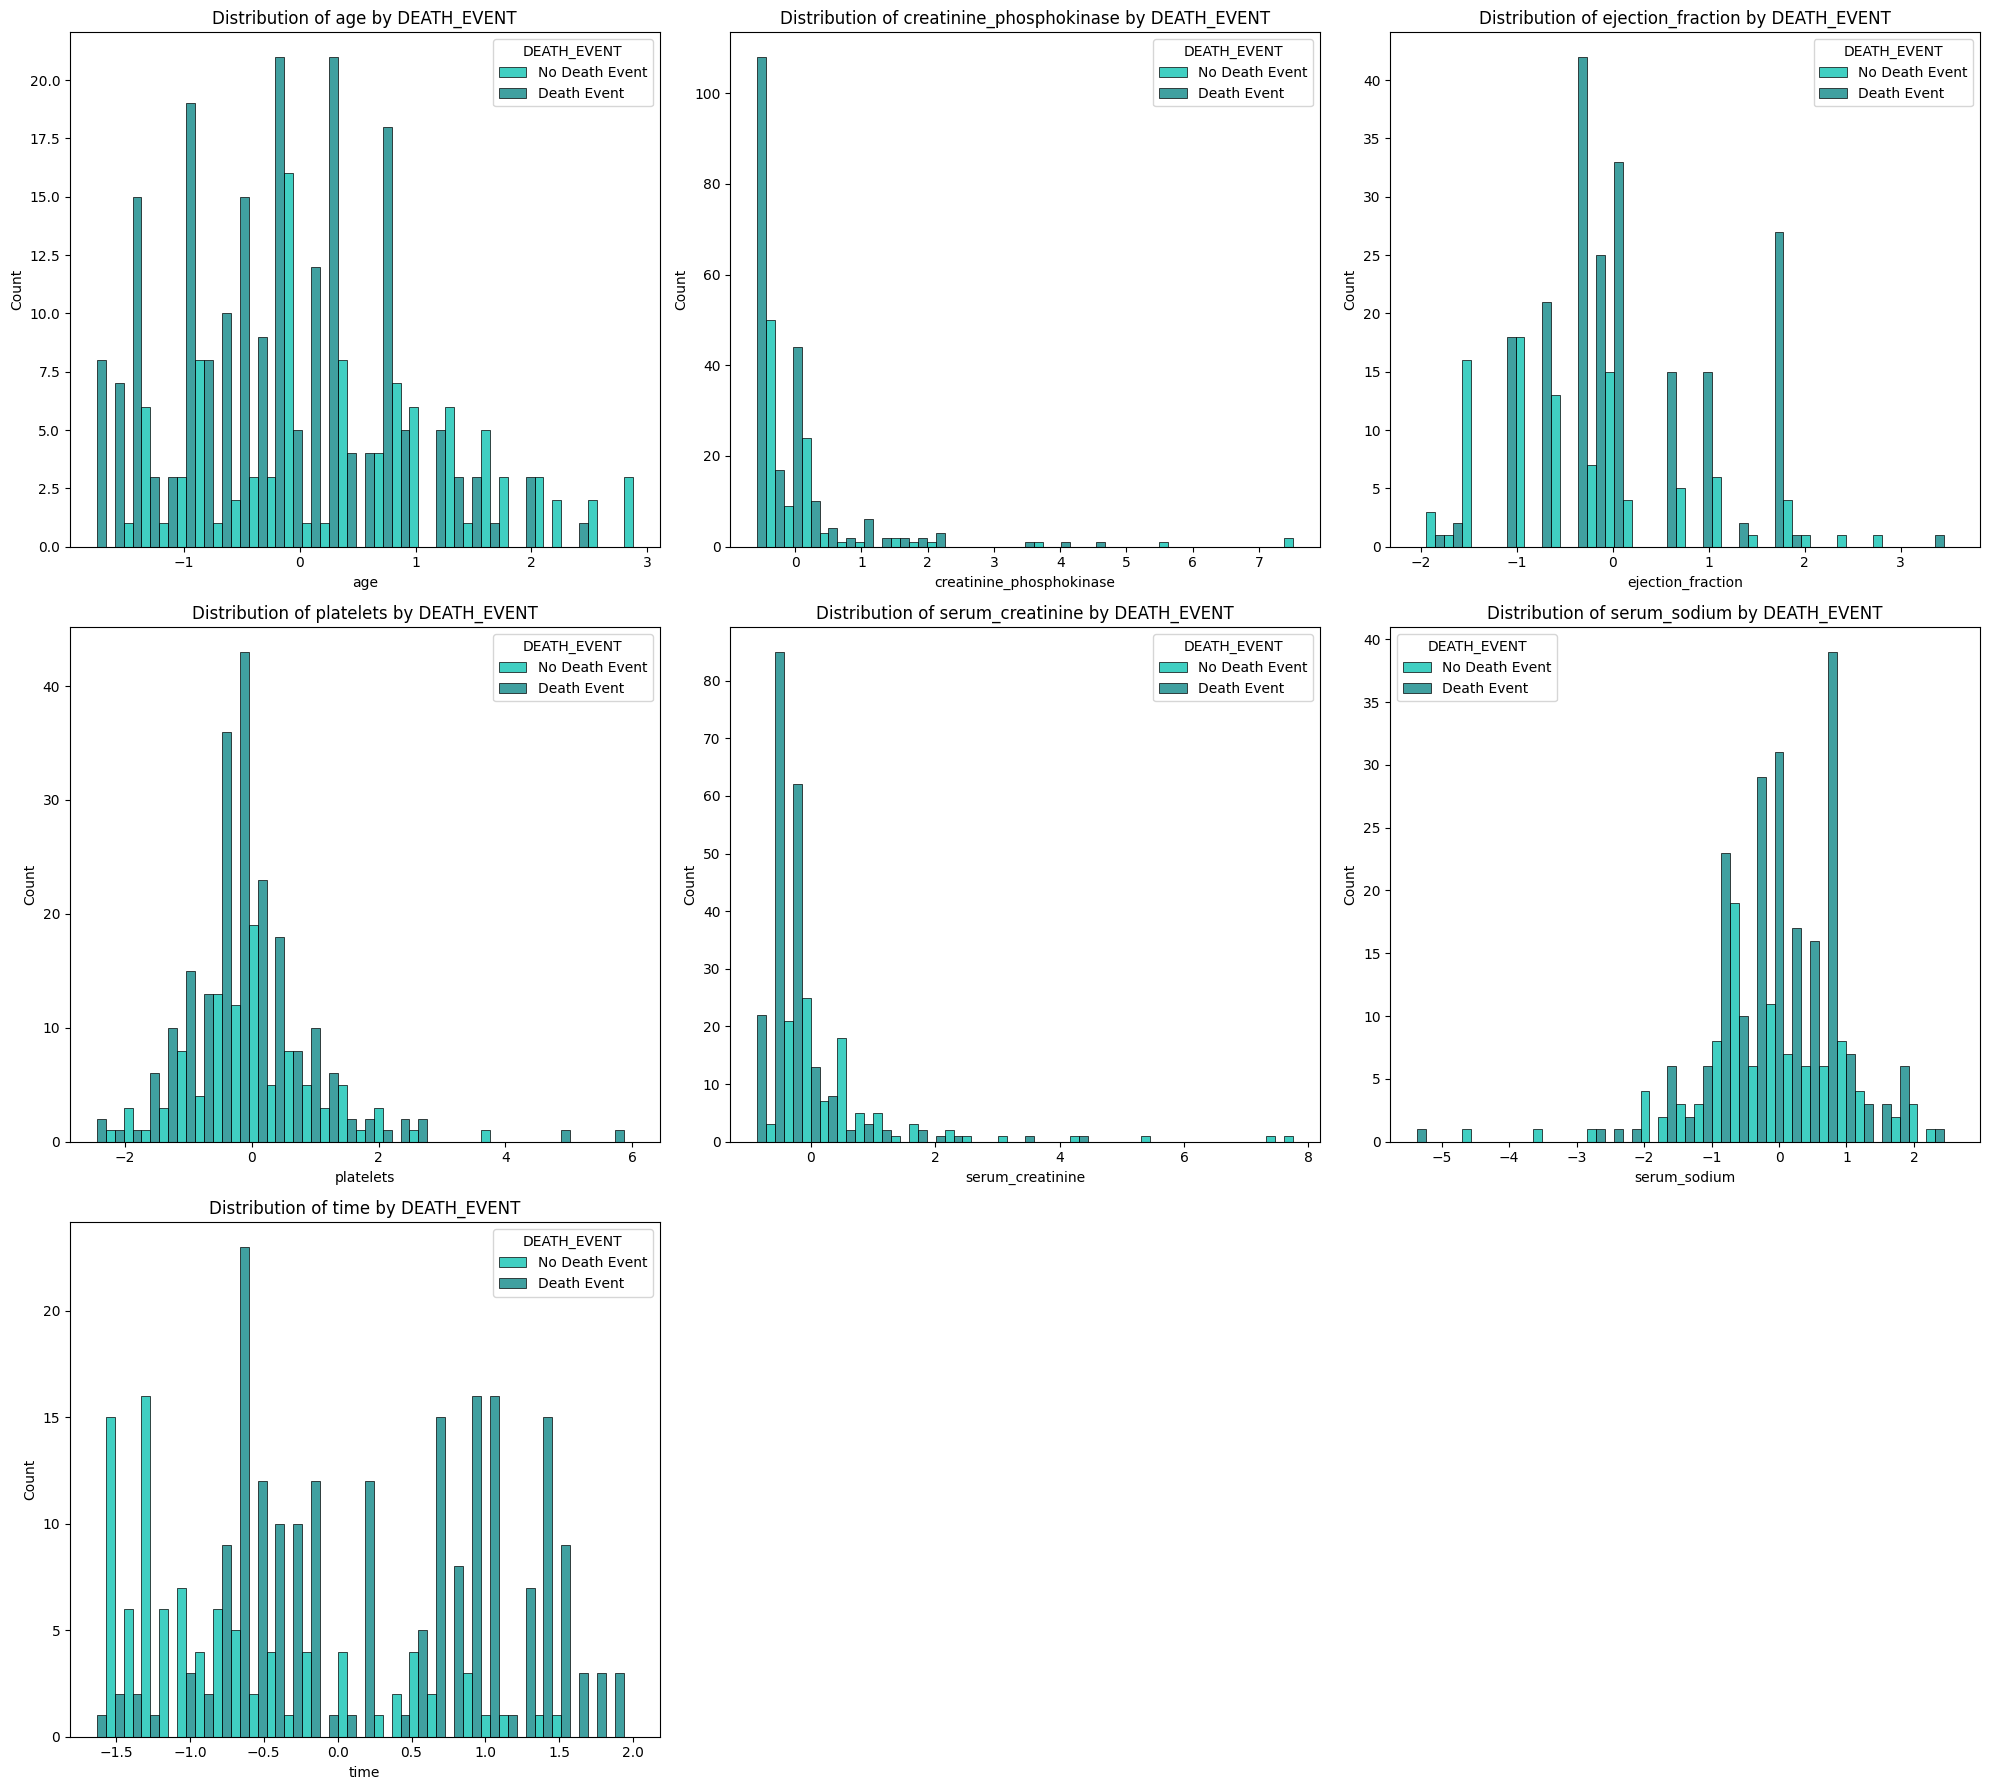

In [ ]:
# Create histograms for each scaled numerical feature
plt.figure(figsize=(20, 18))  # Increase the figure size for larger plots

# Create a 3x3 grid plus one additional subplot for the last feature
for i, feature in enumerate(features):
    if i < 9:  # First 9 features
        plt.subplot(3, 3, i + 1)  # 3 rows and 3 columns
    else:  # 10th feature
        plt.subplot(1, 1, 1)  # Single subplot for the last feature
    sns.histplot(data=df, x=feature, hue='DEATH_EVENT', multiple='dodge', bins=30, palette=['#008080', '#00bfae'])
    plt.title(f'Distribution of {feature} by DEATH_EVENT')
    plt.xlabel(feature)
    plt.ylabel('Count')  # Use 'Count' instead of 'Frequency'
    plt.legend(title='DEATH_EVENT', labels=['No Death Event', 'Death Event'])

# Adjust layout
plt.tight_layout()
plt.show()

#####Summary
---
The features have been scaled and should be distributed around a mean of 0 with a standard deviation of 1. Thus, these histograms are going to range typically from -3 to 3 and can be interpreted as follows:
- 0: Mean of the original data
- 1: 1 standard deviation above the mean
- -1: 1 standard deviation below the mean
- 2: 2 standard deviations above the mean
- -2: 2 standard deviations below the mean

Age has multiple peaks indicating several common age ranges in the data. Creatinine Phosphokinase, platelets and serum creatinine have  long right tails meaning that most values are clustered at the lower end with a few high values extending far to the right; rare but may be significant - if patients with high values are more likely to have a death event, this could be an important predictor. Serum sodiuim with a longer left tail means most values are clustered at higher levels and if low sodium levels are associated with death evenets, this could be relevant.

####Correlation Matrix

Correlation Summaries:
smoking and sex: There is a moderate correlation (0.4459).
DEATH_EVENT and time: There is a moderate correlation (-0.5270).


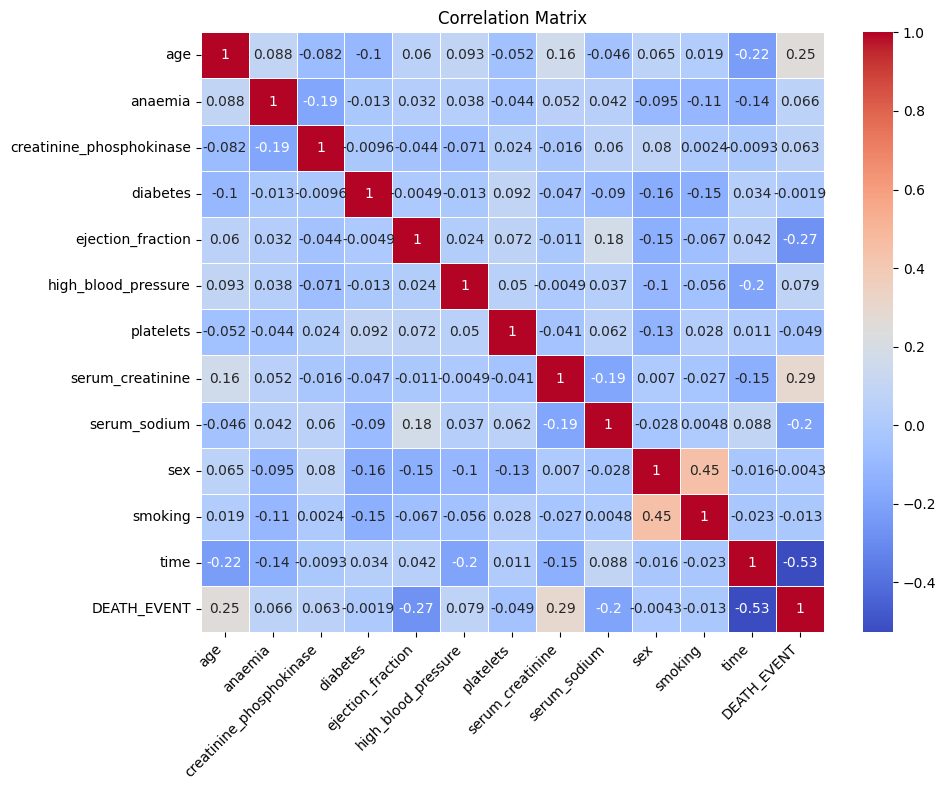

In [ ]:
# Correlation matrix
corr_matrix = df.corr()

# Define thresholds for interpreting correlations
moderate_corr_threshold = 0.3
high_corr_threshold = 0.6

# Function to summarize correlations
def summarize_correlations(corr_matrix):
    print("Correlation Summaries:")
    visited_pairs = set()  # To keep track of visited pairs
    for i, col in enumerate(corr_matrix.columns):
        for j, row in enumerate(corr_matrix.index):
            if i != j:  # Exclude self-correlation (diagonal elements)
                pair = tuple(sorted([row, col]))  # Sort pair to avoid duplicate output
                if pair not in visited_pairs:
                    visited_pairs.add(pair)
                    correlation = corr_matrix.loc[row, col]  # Access correlation value
                    if abs(correlation) >= high_corr_threshold:
                        print(f"{row} and {col}: There is a high correlation ({correlation:.4f}).")
                    elif abs(correlation) >= moderate_corr_threshold:
                        print(f"{row} and {col}: There is a moderate correlation ({correlation:.4f}).")

# Print correlation summaries
summarize_correlations(corr_matrix)

# Visualize correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print()

#####Summary
---
Smoking and sex: There is a moderate correlation (0.4459). As one variable increases, the other tends to increase also.<br><br>
DEATH_EVENT and time: There is a moderate correlation (-0.5270). As time increases, the likelikhoold of the target decreases, suggesting patients who have been monitored for longer periods of time have a lower likelihood of experiencing a death event.


####Variance for Numerical Columns

In [ ]:
# Calculate variance for numerical columns
print("Variance of Numerical Columns:")
variances = df[numerical_cols].var()
print(variances)

Variance of Numerical Columns:
age                         1.003356
anaemia                     0.246122
creatinine_phosphokinase    1.003356
diabetes                    0.244102
ejection_fraction           1.003356
high_blood_pressure         0.228614
platelets                   1.003356
serum_creatinine            1.003356
serum_sodium                1.003356
sex                         0.228614
smoking                     0.218716
time                        1.003356
DEATH_EVENT                 0.218716
dtype: float64


#####Summary
---

High variance: age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, and time all have a variance close to 1.0, indicating they have a wide range of values and considerable spread in the dataset.

Moderate variance: anaemia, diabetes, high_blood_pressure, sex, smoking, and DEATH_EVENT show lower variances (ranging from about 0.22 to 0.25). This suggests these features are less spread out and may have less variability compared to the higher variance features.


---
###Feature Selection



####Feature Selection with SelectKBest

In [ ]:
# Define features and target
features = df.drop(columns='DEATH_EVENT').columns  # Update to include all features
target = 'DEATH_EVENT'

X = df[features]
y = df[target]


# Initialize SelectKBest
kbest = SelectKBest(score_func=f_classif, k=5)  # Adjust the number as needed
X_new = kbest.fit_transform(X, y)

# Get scores and select features
feature_scores = pd.DataFrame({'Feature': features, 'Score': kbest.scores_})
print("SelectKBest Feature Scores:")
print(feature_scores.sort_values(by='Score', ascending=False))


SelectKBest Feature Scores:
                     Feature       Score
11                      time  114.181264
7           serum_creatinine   28.158492
4          ejection_fraction   23.094063
0                        age   20.435946
8               serum_sodium   11.765331
5        high_blood_pressure    1.881937
1                    anaemia    1.310096
2   creatinine_phosphokinase    1.173259
6                  platelets    0.718880
10                   smoking    0.047333
9                        sex    0.005534
3                   diabetes    0.001121


#####Summary
---
We will use the top important features: time, serum_creatinine, ejection_fraction and age. This meets one of the objectives which is to identify key clinical indicators that are predictive of heart failure.

####Drop Irrelevant Features

In [ ]:
# List of features to drop
features_to_drop = ['anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'serum_sodium', 'sex', 'smoking']

# Drop irrelevant features from the original DataFrame
df.drop(columns=features_to_drop, inplace=True)

df

age  ejection_fraction  serum_creatinine      time  DEATH_EVENT
0    1.192945          -1.530560          0.490057 -1.629502            1
1   -0.491279          -0.007077         -0.284552 -1.603691            1
2    0.350833          -1.530560         -0.090900 -1.590785            1
3   -0.912335          -1.530560          0.490057 -1.590785            1
4    0.350833          -1.530560          1.264666 -1.577879            1
..        ...                ...               ...       ...          ...
294  0.098199          -0.007077         -0.284552  1.803451            0
295 -0.491279          -0.007077         -0.187726  1.816357            0
296 -1.333392           1.854958         -0.575031  1.906697            0
297 -1.333392          -0.007077          0.005926  1.932509            0
298 -0.912335           0.585389          0.199578  1.997038            0

[299 rows x 5 columns]

#####Summary
---
Now we have cleaned data with target and selected features in the dataframe.

####Save Cleaned Selected Features/Target to .csv

In [ ]:
# Save the cleaned and scaled feature data with the target to a CSV file
df.to_csv('cleaned_data.csv', index=False)

print("DataFrame saved to 'cleaned_data.csv'.")

DataFrame saved to 'cleaned_data.csv'.


#####Summary
---

New csv with cleaned selected features and target saved for later use.


---
##Split the Data

In [ ]:
# Define features and target
features = ['ejection_fraction', 'serum_creatinine', 'time', 'age']
target = 'DEATH_EVENT'

# Prepare the data
X = df[features]
y = df[target]

# 80-20 Split
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.2, random_state=42)
print("80-20 Split:")
print(f"X_train_80 shape: {X_train_80.shape}")
print(f"X_test_80 shape: {X_test_80.shape}")
print(f"y_train_80 shape: {y_train_80.shape}")
print(f"y_test_80 shape: {y_test_80.shape}")
print()

# 70-30 Split
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)
print("70-30 Split:")
print(f"X_train_70 shape: {X_train_70.shape}")
print(f"X_test_70 shape: {X_test_70.shape}")
print(f"y_train_70 shape: {y_train_70.shape}")
print(f"y_test_70 shape: {y_test_70.shape}")

80-20 Split:
X_train_80 shape: (239, 4)
X_test_80 shape: (60, 4)
y_train_80 shape: (239,)
y_test_80 shape: (60,)

70-30 Split:
X_train_70 shape: (209, 4)
X_test_70 shape: (90, 4)
y_train_70 shape: (209,)
y_test_70 shape: (90,)


#####Summary
---
The data is correctly divided according to the specified splits:
- 80:20 split
  - Training 239 samples
  - Tetsting  60 samples

- 70:30 spit
  - Training 209 samples
  - Testing   90 samples

---
##Model Selection

####Model Fit

In [ ]:
# Define evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Train and evaluate a model.
    Args:
    - model (sklearn estimator): The model to evaluate.
    - X_train (pd.DataFrame): Training features.
    - y_train (pd.Series): Training target.
    - X_test (pd.DataFrame): Testing features.
    - y_test (pd.Series): Testing target.
    Returns:
    - metrics (dict): Dictionary with evaluation metrics.
    """
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics = {
        'Train': {
            'Accuracy': accuracy_score(y_train, y_train_pred),
            'Precision': precision_score(y_train, y_train_pred, pos_label=1),
            'Recall': recall_score(y_train, y_train_pred, pos_label=1),
            'F1 Score': f1_score(y_train, y_train_pred, pos_label=1)
        },
        'Test': {
            'Accuracy': accuracy_score(y_test, y_test_pred),
            'Precision': precision_score(y_test, y_test_pred, pos_label=1),
            'Recall': recall_score(y_test, y_test_pred, pos_label=1),
            'F1 Score': f1_score(y_test, y_test_pred, pos_label=1)
        }
    }

    return metrics

This function trains a given model on training data and evaluates its performance on both training and testing datasets, returning a dictionary of accuracy, precision, recall, and F1 score for each set. It is called in Initial Evaluation.

####Define Models

In [ ]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

Logistic Regression is chosen due to its simplicity and it is easy to interpret. It's ideal for baseline comparisons and understanding feature impacts.

Random Forest Classifier is robust and can capture complex interactions between features while reducing overfitting through ensemble methods.

Gradient Boosting was used for its high performance in capturing intricate patterns through boosting, and can offer a balance between model accuracy and complexity.

####Initial Evaluation

In [ ]:
# Use pior cell split data
print("Evaluating models with 80-20 split:")
for model_name, model in models.items():
    metrics = evaluate_model(model, X_train_80, y_train_80, X_test_80, y_test_80)
    print(f"\n{model_name}:")
    for data_split, scores in metrics.items():
        print(f"{data_split} - Accuracy: {scores['Accuracy']:.4f}, Precision: {scores['Precision']:.4f}, Recall: {scores['Recall']:.4f}, F1 Score: {scores['F1 Score']:.4f}")


# Evaluate
print("\nEvaluating models with 70-30 split:")
for model_name, model in models.items():
    metrics = evaluate_model(model, X_train_70, y_train_70, X_test_70, y_test_70)
    print(f"\n{model_name}:")
    for data_split, scores in metrics.items():
        print(f"{data_split} - Accuracy: {scores['Accuracy']:.4f}, Precision: {scores['Precision']:.4f}, Recall: {scores['Recall']:.4f}, F1 Score: {scores['F1 Score']:.4f}")

Evaluating models with 80-20 split:

Logistic Regression:
Train - Accuracy: 0.8410, Precision: 0.6897, Recall: 0.8451, F1 Score: 0.7595
Test - Accuracy: 0.7667, Precision: 0.7619, Recall: 0.6400, F1 Score: 0.6957

Random Forest:
Train - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Test - Accuracy: 0.7167, Precision: 0.7500, Recall: 0.4800, F1 Score: 0.5854

Gradient Boosting:
Train - Accuracy: 0.9874, Precision: 0.9857, Recall: 0.9718, F1 Score: 0.9787
Test - Accuracy: 0.7500, Precision: 0.8571, Recall: 0.4800, F1 Score: 0.6154

Evaluating models with 70-30 split:

Logistic Regression:
Train - Accuracy: 0.8421, Precision: 0.6757, Recall: 0.8475, F1 Score: 0.7519
Test - Accuracy: 0.7778, Precision: 0.7429, Recall: 0.7027, F1 Score: 0.7222

Random Forest:
Train - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Test - Accuracy: 0.7444, Precision: 0.7692, Recall: 0.5405, F1 Score: 0.6349

Gradient Boosting:
Train - Accuracy: 0.9952, Precision:

#####Summary
---

| Split | Model                       | Train Accuracy | Train Precision | Train Recall | Train F1 Score | Test Accuracy | Test Precision | Test Recall | Test F1 Score | Interpretation                                                                                                                                  |
|-------|-----------------------------|----------------|-----------------|--------------|----------------|---------------|----------------|-------------|---------------|--------------------------------------------------------------------------------------------------------------------------------------------------|
| 80-20 | Logistic Regression         | 0.8410         | 0.6897          | 0.8451       | 0.7595         | 0.7667        | 0.7619         | 0.6400      | 0.6957        | The model shows strong recall on the training set and reasonable performance on the test set. It performs well in identifying positive cases but has a slight drop in precision on the test set. Further tuning could improve its precision. |
|       | Random Forest Classifier    | 1.0000         | 1.0000          | 1.0000       | 1.0000         | 0.7167        | 0.7500         | 0.4800      | 0.5854        | The model exhibits perfect performance on the training set but suffers from a significant drop in test performance, indicating overfitting. It is too closely fit to the training data and needs regularization to generalize better. |
|       | Gradient Boosting Classifier| 0.9874         | 0.9857          | 0.9718       | 0.9787         | 0.7500        | 0.8571         | 0.4800      | 0.6154        | The Gradient Boosting model shows high accuracy and precision on training data but performs poorly on the test set, indicating overfitting. Despite some improvement in precision, it needs hyperparameter tuning to enhance generalization. |
| 70-30 | Logistic Regression         | 0.8421         | 0.6757          | 0.8475       | 0.7519         | 0.7778        | 0.7429         | 0.7027      | 0.7222        | This model demonstrates a good balance between precision and recall with improved performance on the test set compared to the 80-20 split. It is generally robust but could benefit from additional tuning to further enhance its performance. |
|       | Random Forest Classifier    | 1.0000         | 1.0000          | 1.0000       | 1.0000         | 0.7444        | 0.7692         | 0.5405      | 0.6349        | The Random Forest model still shows overfitting with perfect training scores and lower test performance. Regularization is recommended to improve the model’s ability to generalize to unseen data. |
|       | Gradient Boosting Classifier| 0.9952         | 1.0000          | 0.9831       | 0.9915         | 0.7333        | 0.7407         | 0.5405      | 0.6250        | This model exhibits high accuracy on the training data but lower performance on the test set, suggesting overfitting. It needs hyperparameter tuning to reduce overfitting and improve test performance. |


*Logistic Regression:*
-  Shows good performance with strong recall values, indicating effective identification of positive cases. Precision is slightly lower, suggesting some false positives. The model performs well in training, demonstrating the ability to detect positive cases effectively.
- On the test set, Logistic Regression maintains higher recall, which is crucial for detecting positive cases. However, precision drops compared to training, indicating some misclassification of negatives as positives. The model may benefit from further feature engineering or tuning to improve precision and generalization.

*Random Forest Classifier:*
- Achieves perfect training scores, indicating potential overfitting. The model fits the training data exceptionally well, possibly capturing noise and overfitting.
- The test performance shows a significant drop compared to training, with lower accuracy, precision, and recall. This highlights overfitting, as the model struggles with generalization. Regularization techniques, such as adjusting the number of trees or max depth, could help improve generalization.

*Gradient Boosting Classifier:*
-  Shows near-perfect accuracy in training, suggesting overfitting. The high precision and recall values indicate the model fits the training data very well but may capture noise.
- Performs better on the test set compared to Random Forest, showing improved generalization. However, it still exhibits signs of overfitting with slightly lower precision and recall on the test set. Tuning hyperparameters could further improve generalization and test performance.


##Hyperparameter Tuning


####Best Parameters

#####RandomForestClassifier

In [ ]:
# Parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2'],
}

# Initialize model
rf_model = RandomForestClassifier(random_state=42)

# Create GridSearchCV instance
grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1, error_score='raise')

# Fit model to perform search
grid_search.fit(X_train, y_train)

# Get best hyperparameters from search
best_rf_params = grid_search.best_params_

# Print the best hyperparameters
print("\nBest Hyperparameters for RandomForestClassifier:")
for param, value in best_rf_params.items():
    print(f"{param}: {value}")



Best Hyperparameters for RandomForestClassifier:
bootstrap: True
max_depth: None
max_features: sqrt
min_samples_leaf: 1
min_samples_split: 5
n_estimators: 50


We will use these best parameters with class_weight='balanced' for tuning.

#####Logistic Regression

In [ ]:
# Define the parameter grid for LogisticRegression
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization types
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers
    'max_iter': [100, 200, 300],  # Maximum number of iterations
    'multi_class': ['ovr']  # Multi-class handling strategy
}

# Initialize the model
lr_model = LogisticRegression(max_iter=100, multi_class='auto', random_state=42)

# Create GridSearchCV instance
grid_search = GridSearchCV(lr_model, param_grid, cv=5, n_jobs=-1, error_score='raise')

# Fit model to perform search
grid_search.fit(X_train, y_train)

# Get best hyperparameters from search
best_lr_params = grid_search.best_params_

# Print best hyperparameters
print("\nBest Hyperparameters for LogisticRegression:")
for param, value in best_lr_params.items():
    print(f"{param}: {value}")


Best Hyperparameters for LogisticRegression:
C: 0.1
max_iter: 100
multi_class: ovr
penalty: l1
solver: liblinear


We will use these best parameters with class_weight='balanced' for tuning.

#####GradientBoostingClassifier

In [ ]:
# Define the parameter grid for GradientBoostingClassifier
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size
    'max_depth': [3, 5, 7],  # Maximum depth of individual trees
}

# Initialize the model
gb_model = GradientBoostingClassifier(random_state=42)

# Create GridSearchCV instance
grid_search = GridSearchCV(gb_model, param_grid, cv=5, n_jobs=-1, error_score='raise')

# Fit model to perform search
grid_search.fit(X_train, y_train)

# Get best hyperparameters from search
best_gb_params = grid_search.best_params_

# Print best hyperparameters
print("\nBest Hyperparameters for GradientBoostingClassifier:")
for param, value in best_gb_params.items():
    print(f"{param}: {value}")


Best Hyperparameters for GradientBoostingClassifier:
learning_rate: 0.2
max_depth: 3
n_estimators: 150


We will use these best parameters for tuning.

##Evaluate

In [ ]:
# Reinitialize models with best hyperparameters and class_weight adjustment
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', **best_rf_params)
lr_model = LogisticRegression(random_state=42, class_weight='balanced', **best_lr_params)
gb_model = GradientBoostingClassifier(random_state=42, **best_gb_params)  # Note: Gradient Boosting doesn't support class_weight

# Evaluate models on 80-20 split
print("Evaluation on 80-20 Split")
evaluate_and_print(rf_model, X_train_80, y_train_80, X_test_80, y_test_80, "Random Forest")
evaluate_and_print(lr_model, X_train_80, y_train_80, X_test_80, y_test_80, "Logistic Regression")
evaluate_and_print(gb_model, X_train_80, y_train_80, X_test_80, y_test_80, "Gradient Boosting")

# Evaluate models on 70-30 split
print("Evaluation on 70-30 Split")
evaluate_and_print(rf_model, X_train_70, y_train_70, X_test_70, y_test_70, "Random Forest")
evaluate_and_print(lr_model, X_train_70, y_train_70, X_test_70, y_test_70, "Logistic Regression")
evaluate_and_print(gb_model, X_train_70, y_train_70, X_test_70, y_test_70, "Gradient Boosting")



Evaluation on 80-20 Split
Random Forest:
  Train - Accuracy: 0.9623, Precision: 0.8974, Recall: 0.9859, F1 Score: 0.9396
  Test  - Accuracy: 0.7333, Precision: 0.6957, Recall: 0.6400, F1 Score: 0.6667
  Test Confusion Matrix:
[[16  9]
 [ 7 28]]

Logistic Regression:
  Train - Accuracy: 0.7950, Precision: 0.6058, Recall: 0.8873, F1 Score: 0.7200
  Test  - Accuracy: 0.7167, Precision: 0.6429, Recall: 0.7200, F1 Score: 0.6792
  Test Confusion Matrix:
[[18  7]
 [10 25]]

Gradient Boosting:
  Train - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
  Test  - Accuracy: 0.7667, Precision: 0.8235, Recall: 0.5600, F1 Score: 0.6667
  Test Confusion Matrix:
[[14 11]
 [ 3 32]]

Evaluation on 70-30 Split
Random Forest:
  Train - Accuracy: 0.9665, Precision: 0.8939, Recall: 1.0000, F1 Score: 0.9440
  Test  - Accuracy: 0.7444, Precision: 0.7500, Recall: 0.5676, F1 Score: 0.6462
  Test Confusion Matrix:
[[21 16]
 [ 7 46]]

Logistic Regression:
  Train - Accuracy: 0.7943, Precision

####Metrics Summary
---

| Split | Model                  | Train Accuracy | Train Precision | Train Recall | Train F1 Score | Test Accuracy | Test Precision | Test Recall | Test F1 Score | Interpretation                                              |
|-------|------------------------|----------------|-----------------|--------------|----------------|----------------|----------------|-------------|---------------|-------------------------------------------------------------|
| 80-20 | Logistic Regression    | 0.7950         | 0.6058          | 0.8873       | 0.7200         | 0.7167         | 0.6429         | 0.7200      | 0.6792        | Good performance on test with a slight drop in recall. Potential for better balance in precision and recall. |
|       | Random Forest          | 0.9623         | 0.8974          | 0.9859       | 0.9396         | 0.7333         | 0.6957         | 0.6400      | 0.6667        | Strong training performance with noticeable drop on test. Likely overfitting.                                |
|       | Gradient Boosting      | 1.0000         | 1.0000          | 1.0000       | 1.0000         | 0.7667         | 0.8235         | 0.5600      | 0.6667        | Excellent training performance but significant drop on test. Indicates overfitting.                           |
| 70-30 | Logistic Regression    | 0.7943         | 0.5870          | 0.9153       | 0.7152         | 0.7111         | 0.6222         | 0.7568      | 0.6829        | Good performance on test with slight drop from training metrics. Could benefit from fine-tuning.            |
|       | Random Forest          | 0.9665         | 0.8939          | 1.0000       | 0.9440         | 0.7444         | 0.7500         | 0.5676      | 0.6462        | Strong training performance with noticeable test drop. Likely overfitting.                                   |
|       | Gradient Boosting      | 1.0000         | 1.0000          | 1.0000       | 1.0000         | 0.7444         | 0.7692         | 0.5405      | 0.6349        | Excellent training metrics with significant drop on test, indicating overfitting.                            |



*Random Forest Classifier:*
- Exhibits overfitting with excellent training metrics and a significant drop in test performance.

*Logistic Regression:*
- Shows a good balance between training and test performance across both splits. The recall is slightly lower on the test set compared to the training set, but it maintains relatively stable precision and F1 scores.

*Gradient Boosting Classifier:*
- Shows overfitting with perfect training metrics and a significant decrease in test metrics.

Conclusion:

Logistic Regression appears to be the most robust model among the three, with a better balance between training and test performance. The 70-30 split shows slightly better recall and F1 score on the test set compared to the 80-20 split. It means that the model performs better in identifying positive cases (deaths) and maintains a similar overall balance of precision and recall.

This step meets one of the objectives which is to evaluate different machine learning models to find a most accurate predictor.

####Confusion Matrix

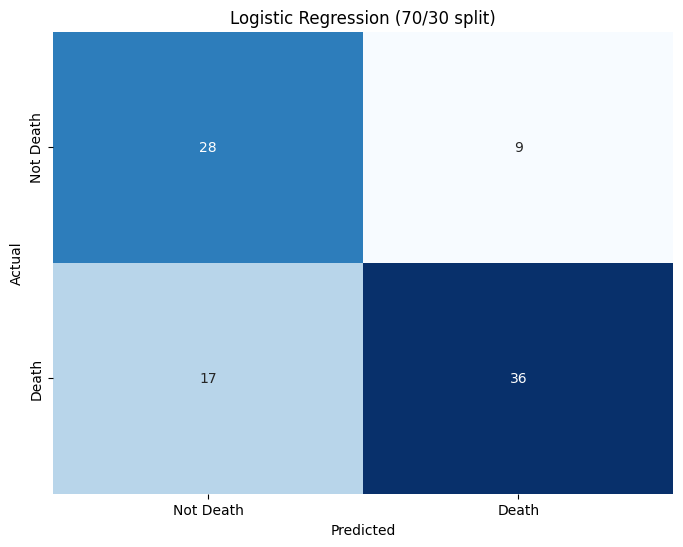

In [ ]:
# Confusion matrix for RandomForestClassifier GridSearch
conf_mat_rf = [[28, 9], [17, 36]]

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Death', 'Death'],
            yticklabels=['Not Death', 'Death'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression (70/30 split)')
plt.show()


**Logistic Regression 70/30 split:**

- True Negatives (TN): 28 Top Left Cases were correctly predicted as No Death.
- False Positives (FP): 9 Top Right Case was incorrectly predicted as Death.
- False Negatives (FN): 17 Bottom Left Cases were incorrectly predicted as No Death when actual is Death.
- True Positives (TP): 36 Bottom Right Cases were correctly predicted as Death.

Test  -  Accuracy: 0.7111, Precision: 0.6222, Recall: 0.7568, F1 Score: 0.6829

The precision of 0.6222 suggests that when it predicts an instance as 'Death', it is correct 62.2% of the time. The recall of 0.7568 indicates that it correctly identifies 75.68% of all actual 'Death' instances. The F1 score of 0.6829 confirms a good balance between precision and recall.

###Save Model and Predictions

In [ ]:
# Make predictions on the test set using the Logistic Regression model
y_test_pred = lr_model.predict(X_test_70)  # Ensure you use the appropriate test data

# Save the predictions to a CSV file
predictions_df = pd.DataFrame({
    'True Labels': y_test_70,
    'Predictions': y_test_pred
})
predictions_df.to_csv('model_predictions_best.csv', index=False)

# Save the Logistic Regression model to a file
dump(lr_model, 'logistic_regression_7030.joblib')

# Load the model from the file (for verification)
lr_model_loaded = load('logistic_regression_7030.joblib')

print("Predictions saved to 'model_predictions_best.csv'.")
print("Logistic Regression model saved as 'logistic_regression_7030.joblib'.")


Predictions saved to 'model_predictions_best.csv'.
Logistic Regression model saved as 'logistic_regression_7030.joblib'.


## Summary of Findings

- **Dataset Overview:**
  - The dataset comprises 299 patients with 13 clinical variables, including demographic factors, clinical measurements, and health conditions.

- **Key Insights:**
  - **Demographics and Health Conditions:** The dataset predominantly includes adult male patients (64.88%), with significant proportions affected by anaemia (43%), diabetes (42%), and high blood pressure (35%).
  - **Clinical Measurements:** Notable averages include ejection fraction (mean ~38.08%), serum creatinine (mean ~1.39 mg/dL), serum sodium (mean ~136.63 mEq/L), and platelet count (mean ~263,358 kiloplatelets/mL), indicating variability across patients.
  - **Follow-up Period:** Patients were monitored for an average of ~130.26 days, offering insights into the duration of study follow-up.

- **Feature Importance:**
  - Through various feature selection methods, the following features were consistently identified as predictive of heart failure: 'ejection_fraction', 'serum_creatinine', and 'time'.

## Model Evaluation and Selection

- **Model Performance:**
  - **Logistic Regression 70/30 split:** This model achieved an accuracy of 71% with a precision of 62.2%, recall of 75.68%, and F1 score of 68.29%.
  - **Gradient Boosting:** Shows overfitting with perfect training metrics and a significant decrease in test metrics.
  - **Random Forest:** Exhibits overfitting with excellent training metrics and a significant drop in test performance.
- **Model Selection Rationale:**
  - Logistic Regression was selected as it appears to be the most robust model among the three tested. The 70/30 split shows slightly better recall and the F1 score than the  80/20 split. This suggests that the model performs better in identifying positive cases (deaths) and maintains a similar overall balance of precision and recall.

## Clinical Implications and Recommendations

- **Clinical Insights:**
  - The identified predictors can aid healthcare providers in prioritizing interventions and monitoring strategies for patients at higher risk of heart failure.
  - Examples of practical applications include personalized treatment plans based on patient demographics and clinical measurements.

## Limitations and Future Directions

- **Study Limitations:**
  - Potential limitations include the dataset's size and scope, as well as assumptions made during model training.
  - Further validation in diverse patient populations and incorporation of additional clinical variables could enhance model robustness.

- **Future Research Directions:**
  - Future studies could consider exploring additional advanced machine learning techniques or ensemble methods to further enhance predictive accuracy and generalize findings beyond the scope of this project.
  - Research focusing on real-time predictive modeling and integration with electronic health records could further enhance clinical decision support systems.


